# EMNIST Dataset Classification 

some blurb about stuff


### Table of Contents:
1. EDA
2. Feature Selection vs Dimensionality Reduction
    1. Mutual Information
    2. PCA
3. Standard Classification
4. CNN

### Some notes on how to use this:
- I'm assuming you have a level of rudimentary understanding of how one may build or use a classification algorithm. This information probably won't be super useful to you if this is your first time encountering ML concepts.
- Probably don't copy this code directly. I don't mind if you do, BUT I am handwaving over a lot of important details here. A lot of the approaches presented in this notebook will be absent of important steps in favor of having a cleaner presentation in the notebook

## EDA

In [2]:
from scipy.io import loadmat

full = loadmat('EMNIST/emnist-byclass.mat')

In [3]:
data = full['dataset']
del full

Hard to explain exactly what's going on with the structure of the dataset, but the relevant indices are as follows:

data[0][0][0][0][0][0][:] - these are the preallocated training data

data[0][0][0][0][0][1][:] - these are our training labels

data[0][0][1][0][0][0][:] - test data

data[0][0][1][0][0][1][:] - test labels

Let's take a quick look at what these images look like!

In [7]:
data[0][0][0][0][0][0][1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  19,  27,   8,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,  47, 157,
       189, 126,  33,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,  33, 126,
       208, 247, 252, 244, 159,  22,   3,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  36,
        91, 207, 245, 250, 251, 252, 207,  46,   8,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [9]:
data[0][0][0][0][0][1][1]

array([36], dtype=uint8)

In [6]:
from PIL import Image

im = Image.fromarray(data[0][0][0][0][0][0][1].reshape((28,28)).T)
im

Not to spoil everything, but the main things you should know going forward are the following:

- Each image is composed of 28x28 black and white pixels (so just the one channel)

- Each pixel can take a value on [0,255] which indicates its intensity/brightness

- 62 possible classes

Our 62 possible classes correspond to:

Index 0-9: nums 0-9

Index 10-35: A-Z

Index 36-61: a-z

### So, how do we formulate this problem in the context of classification algorithms?

The straightforward answer is to simply treat every value/pixel as its own feature, in this case meaning we would end up with 784 features. However this presents its sets of problems due to that high dimensionality (algorithm runtime, memory limitations, curse of dimensionality, etc.), so we'll need to think about strategies to get around that.

## Feature Selection and Dimensionality Reduction

One way that we could think about circumventing this problem is by reducing the number of features that we're using to predict in one of two ways:

1. Selecting only the most important features (i.e., features that provide the most information) and using them to form our model.

2. Find some sort of alternate representation of our data, with fewer features, that encapsulates some meaningful information about the original data.

Let's look at a quick example of each.


### Feature Selection: Mutual Information
Blurb on how it works, maybe

In [10]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.feature_selection import mutual_info_classif

In [13]:
mi_X = data[0][0][0][0][0][0][0:50000]
mi_y = data[0][0][0][0][0][1][0:50000]
mi = mutual_info_classif(mi_X,mi_y)
mi

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0.00000000e+00, 1.45944931e-03, 2.62843451e-04, 5.27375616e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.84151372e-03,
       4.48791464e-03, 3.81074157e-03, 8.13158004e-03, 0.00000000e+00,
       0.00000000e+00, 3.59986858e-04, 0.00000000e+00, 0.00000000e+00,
       1.34225668e-03, 1.99643969e-03, 2.91168555e-03, 7.95578549e-04,
       0.00000000e+00, 0.00000000e+00, 3.57667132e-03, 1.46492012e-03,
       0.00000000e+00, 0.00000000e+00, 1.06452307e-03, 9.09570429e-04,
       0.00000000e+00, 2.30816752e-05, 0.00000000e+00, 0.00000000e+00,
       5.61052153e-03, 3.60676754e-03, 7.90976344e-03, 2.32159855e-02,
       1.87324802e-02, 2.19408511e-02, 1.25425291e-02, 9.73606160e-03,
       7.24677719e-03, 1.33210825e-02, 1.90640668e-02, 2.10070398e-02,
       1.72119816e-02, 3.15931980e-02, 3.34485305e-02, 3.36392512e-02,
       3.63396207e-02, 3.16761853e-02, 1.78325413e-02, 1.27931249e-02,
       8.05799268e-03, 4.31594089e-03, 0.00000000e+00, 0.00000000e+00,
      

For a quick visualization of what this looks like:

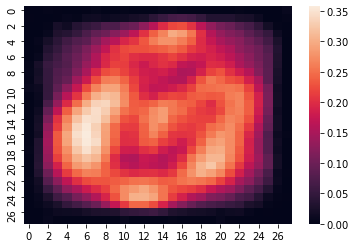

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(mi.reshape(28,28).T);

Above, brighter spots correspond to areas that are more correlated with our target values.

In [21]:
indexList = np.flip(np.argsort(mi))

In [22]:
indexList
#indexList holds the indices of the 'most important' features in descending order

array([184, 185, 183, 186, 182, 156, 209, 210, 213, 157, 155, 236, 212,
       208, 211, 237, 181, 214, 158, 552, 187, 154, 235, 238, 264, 263,
       579, 215, 551, 524, 360, 159, 207, 525, 332, 578, 180, 423, 550,
       359, 188, 128, 580, 153, 388, 265, 129, 239, 234, 262, 553, 577,
       240, 451, 241, 405, 406, 523, 331, 160, 549, 576, 127, 387, 216,
       497, 424, 396, 242, 379, 130, 378, 292, 604, 266, 606, 605, 377,
       303, 603, 304, 291, 607, 581, 496, 628, 602, 627, 126, 380, 395,
       206, 261, 189, 629, 522, 131, 217, 452, 290, 368, 233, 599, 179,
       404, 498, 630, 407, 243, 548, 598, 575, 432, 541, 433, 601, 479,
       495, 416, 358, 570, 526, 415, 608, 600, 470, 293, 330, 350, 626,
       542, 386, 425, 152, 631, 514, 547, 461, 469, 267, 161, 569, 574,
       268, 554, 349, 361, 333, 275, 434, 632, 132, 302, 633, 460, 376,
       289, 381, 245, 521, 351, 244, 397, 480, 442, 269, 515, 367, 408,
       352, 657, 488, 125, 656, 321, 571, 414, 320, 274, 453, 63

Let's see how well this works! Using Random Forest for our model, lets look how our model's accuracy increases with added features:

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

toColumns = list(zip(*mi_X))

scores=[]
for i in range(2,65):
    #need to snag the appropriate features
    count=1
    data = np.array(toColumns[indexList[0]])
    while count<i:   
        data = np.column_stack((data,np.array(toColumns[indexList[count]]).reshape(len(toColumns[i]),1)))
        count+=1
    #then do the modeling
    X_train,X_test,y_train,y_test = train_test_split(data,mi_y, test_size=0.3)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    temp = rf.score(X_test,y_test)
    print(temp)
    scores.append(temp)

<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.1324


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.13566666666666666


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.14886666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.16


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.181


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.20233333333333334


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.2118


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.2244


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.23093333333333332


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.233


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.25666666666666665


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.26306666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.2698


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.276


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.2812


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.2809333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.2858


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.29406666666666664


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.3376


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.35033333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.3474


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.3595333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.3569333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.3742


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.3828666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.3934


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.3924


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.40313333333333334


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.41113333333333335


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.4478


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.45126666666666665


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.45286666666666664


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.4570666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.4614666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.46686666666666665


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.4679333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5096


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5086666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5168666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5222


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5186666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.524


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5231333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5170666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.523


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5244666666666666


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5274


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5393333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5339333333333334


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5325333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.544


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5528666666666666


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5548666666666666


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5597333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5862666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5823333333333334


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5966666666666667


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5918


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5898


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5971333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5933333333333334


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.6027333333333333


<ipython-input-30-cf41432da07d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.599


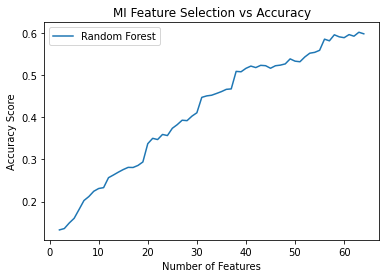

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(2,65),scores, label='Random Forest')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Score')
plt.title('MI Feature Selection vs Accuracy')
plt.legend()
plt.show();

This graph is actually fairly interesting, especially in comparison to PCA which you will see in just a moment. A couple of things to note is how irregular the changes are. Sometimes with a new feature you see a huge increase in accuracy, other times small increase, and sometimes we even get a decrease in accuracy with a new feature. Additionally, our accuracy isn't even that good. We can certainly do better than this!

### PCA


Going to be using SKLearn LogReg, a non-SKLearn LogReg, and then RF additionally.

In [47]:
#non-SKLearn LogReg:
#sigmoid activation
def sigmoid(z):
    return 1/ (1+np.exp(-z))

#cross entropy loss (J):

def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ x)
    #grad returns a value for each bi per row
    return cost, grad

def fit(x, y, max_iter=5000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        #basically a boolean map for each class
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta = theta + alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs

def predict(classes, thetas, x):
    #inserts column of 1s at index 0 to multiple against b0
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]) for xi in x]
    return [classes[p] for p in preds]

def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition
from sklearn.metrics import accuracy_score

scoresSKLR = []
#scoresMeLR = []
scoresRF = []

for i in range(1,30):
    pca = decomposition.PCA(n_components=i)
    X_train,X_test,y_train,y_test = train_test_split(mi_X,mi_y, test_size=0.3)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    lrSK = LogisticRegression(max_iter=10000)
    lrSK.fit(X_train,y_train)
    #thetas, classes, costs = fit(X_train,y_train)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    scoresSKLR.append(lrSK.score(X_test,y_test))
    #scoresMeLR.append(score(classes, thetas, X_test, y_test))
    scoresRF.append(rf.score(X_test,y_test))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-62-c71176684ca0>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-62-c71176684ca0>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
/opt/anaconda3/envs/metis/

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-62-c71176684ca0>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_tra

<ipython-input-62-c71176684ca0>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


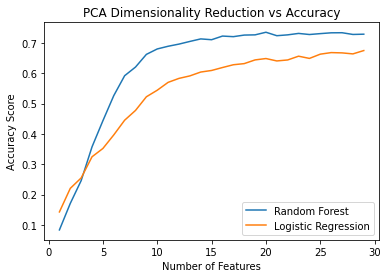

In [64]:
plt.plot(range(1,len(scoresRF)+1),scoresRF, label='Random Forest')
plt.plot(range(1,len(scoresSKLR)+1), scoresSKLR, label='Logistic Regression')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Score')
plt.title('PCA Dimensionality Reduction vs Accuracy')
plt.legend()
plt.show();

Some blurb

### A quick look at a CNN

In [2]:
from scipy.io import loadmat

full = loadmat('EMNIST/emnist-byclass.mat')
data = full['dataset']
del full
arrs = data[0][0][0][0][0][0]
labels = data[0][0][0][0][0][1]

In [3]:
arrs = arrs.reshape((arrs.shape[0],28,28,1))
X=np.empty((len(arrs),28,28))
for i in range(len(arrs)):
    X[i]= arrs[i].T

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X,labels, test_size=.33)


In [5]:
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# normalize to range [0-1]
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [6]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [7]:
batch_size = 64
epochs = 10
num_classes = 62

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#using adam optimizer
tf.config.run_functions_eagerly(True)
#not sure why but need to set the above switch in order for things to run

In [10]:
emnist_train = model.fit(train_norm, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/10
7307/7307 [==============================] - 861s 118ms/step - loss: 0.6765 - accuracy: 0.7892
Epoch 2/10
7307/7307 [==============================] - 842s 115ms/step - loss: 0.3737 - accuracy: 0.8615
Epoch 3/10
7307/7307 [==============================] - 840s 115ms/step - loss: 0.3464 - accuracy: 0.8696
Epoch 4/10
7307/7307 [==============================] - 2664s 365ms/step - loss: 0.3291 - accuracy: 0.8744
Epoch 5/10
7307/7307 [==============================] - 1194s 163ms/step - loss: 0.3137 - accuracy: 0.8789
Epoch 6/10
7307/7307 [==============================] - 850s 116ms/step - loss: 0.3000 - accuracy: 0.8842
Epoch 7/10
7307/7307 [==============================] - 2797s 383ms/step - loss: 0.2924 - accuracy: 0.8854
Epoch 8/10
7307/7307 [==============================] - 836s 114ms/step - loss: 0.2821 - accuracy: 0.8894
Epoch 9/10
7307/7307 [==============================] - 847s 116ms/step - loss: 0.2750 - accuracy: 0.8910
Epoch 10/10
7307/7307 [====================

In [15]:
model.evaluate(test_norm,test_y)

7198/7198 [==============================] - 223s 31ms/step - loss: 0.4052 - accuracy: 0.8628


[0.40515509247779846, 0.8628331422805786]